# Data Exploration and Visualization

In [15]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [16]:
# load dataset
cleaned_df = pd.read_csv('../dataset/Solcast_leon_20_21_clean.csv')
cleaned_df.head()


,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,2019-12-31,12,2019-12-31,7.71,3.88,39.5,928.02,126.4,0.71,631.7,234.8,37.7
1,2020-01-01,1,2020-01-01,6.05,4.19,57.5,927.81,155.9,0.65,626.8,234.5,40.8
2,2020-01-02,1,2020-01-02,5.01,6.66,63.7,925.93,133.0,0.89,309.3,191.5,101.5
3,2020-01-03,1,2020-01-03,5.03,10.04,73.2,928.38,94.7,0.68,131.3,155.5,109.1
4,2020-01-04,1,2020-01-04,4.79,5.74,70.3,930.70,124.0,0.97,35.4,121.6,117.3


In [17]:
# descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,6.489684,13.483773,14.128292,58.556499,916.332653,178.746012,3.448829,395.010757,329.585194,114.348378
std,3.437292,6.518772,5.474309,15.375976,5.686088,75.506190,2.022999,249.722925,141.284983,53.053706
min,1.000000,-0.488889,2.733333,19.666667,893.110000,10.900000,0.510000,0.000000,54.818182,26.300000
25%,4.000000,8.630420,10.126136,46.732143,913.126496,121.933333,1.830625,147.192308,219.100000,73.800000
50%,7.000000,12.514286,14.040000,58.923077,916.746667,175.500000,2.980000,438.000000,328.750000,101.615385
75%,9.000000,18.686607,17.603333,70.215385,920.012500,238.666667,4.623333,632.126923,457.423077,149.366667
max,12.000000,29.260000,33.786667,96.444444,930.820000,346.230769,10.611111,809.454545,569.800000,291.200000


In [18]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_GHI          0
Daily_radiation    0
dtype: int64

In [19]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       727 non-null    object 
 1   MonthPE          727 non-null    int64  
 2   Date             727 non-null    object 
 3   Daily_Temp       727 non-null    float64
 4   Daily_Precip     727 non-null    float64
 5   Daily_Humidity   727 non-null    float64
 6   Daily_Pressure   727 non-null    float64
 7   Daily_WindDir    727 non-null    float64
 8   Daily_WindSpeed  727 non-null    float64
 9   Daily_DNI        727 non-null    float64
 10  Daily_GHI        727 non-null    float64
 11  Daily_radiation  727 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 68.3+ KB


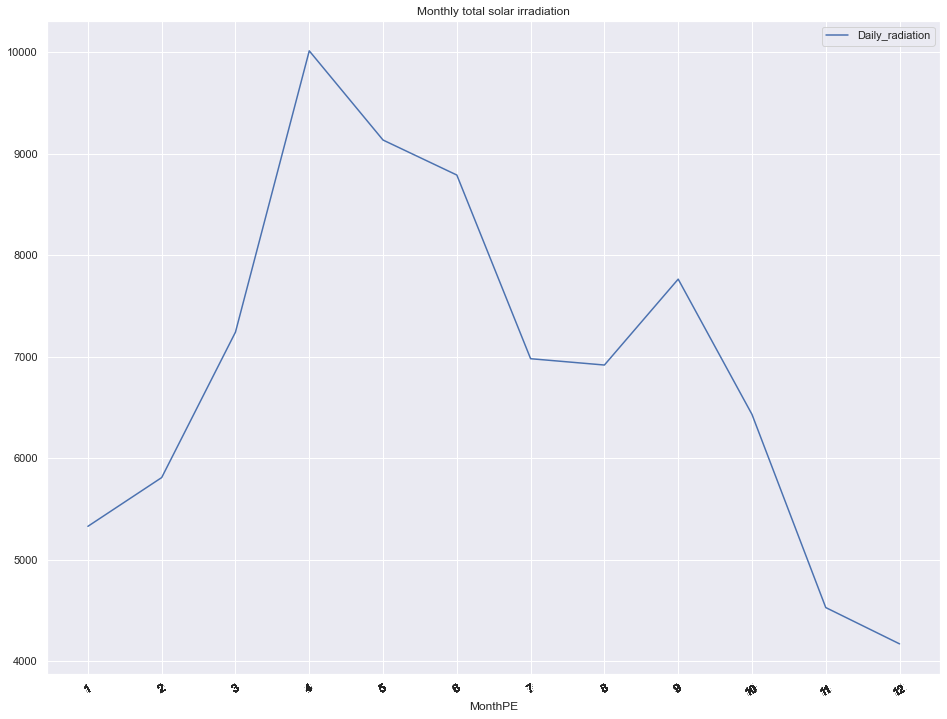

In [20]:
# plot of total irradiation for each 
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

Locator attempting to generate 3994 ticks ([-36.2, ..., 762.4000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3994 ticks ([-36.2, ..., 762.4000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3994 ticks ([-36.2, ..., 762.4000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3994 ticks ([-36.2, ..., 762.4000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3994 ticks ([-36.2, ..., 762.4000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3994 ticks ([-36.2, ..., 762.4000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3994 ticks ([-36.2, ..., 762.4000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3994 ticks ([-36.2, ..., 762.4000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3994 ticks ([-36.2, ..., 762.400000000011

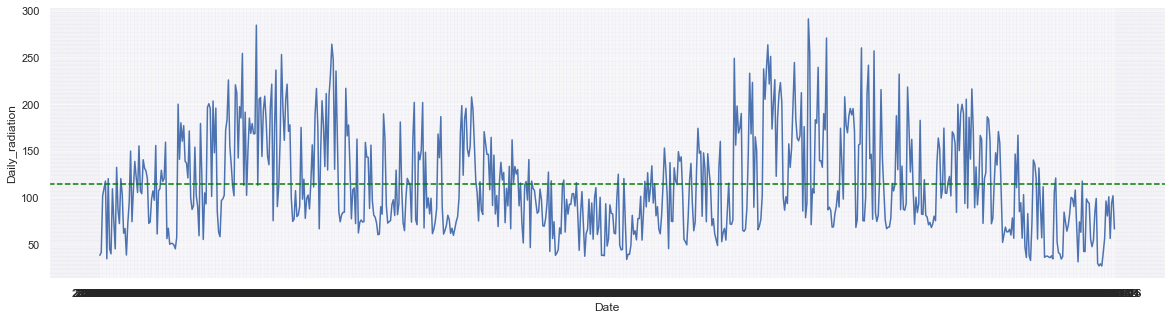

In [21]:
# daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

plt.show()
ax.legend()

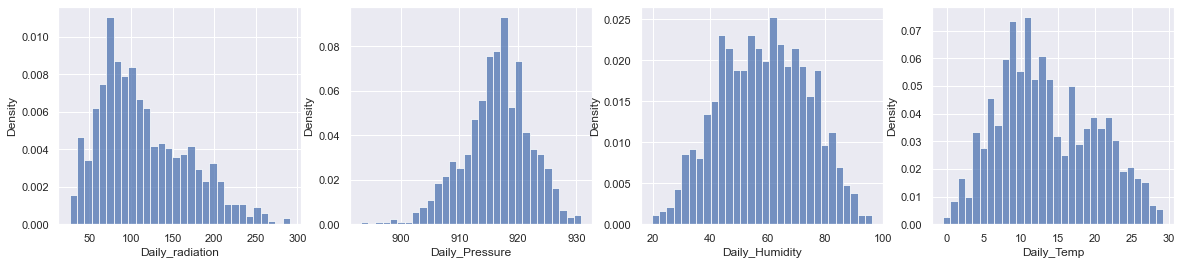

In [22]:
# histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

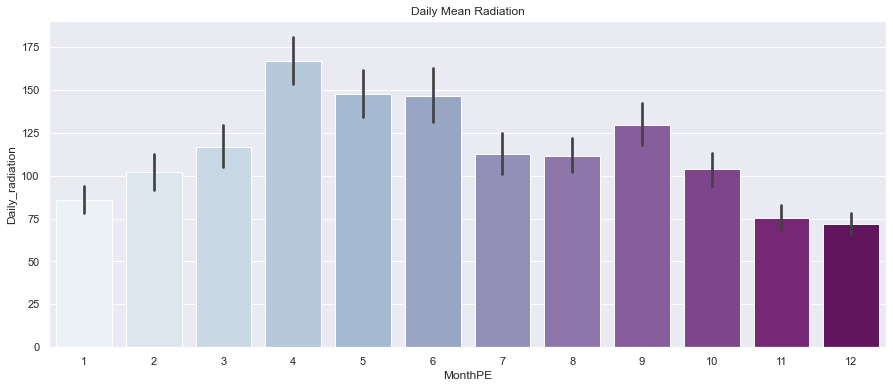

In [23]:
# histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

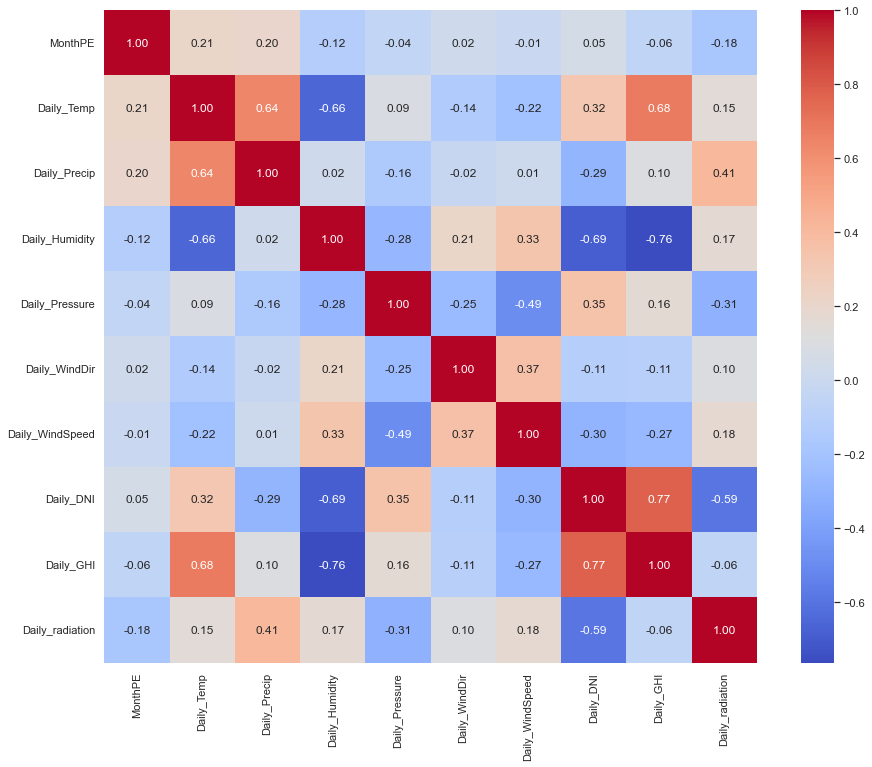

In [24]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

### Statistical check: stationary or non-stationary

In [28]:
# adfuller test on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) 

# good value for p-value is <= 0.05

ADF Statistic: -4.013711
p-value: 0.001340
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [30]:
# convert to logarithm scale and test
from math import log
Xrad = cleaned_df['Daily_radiation'].values.astype(int)
Xrad_log = log(Xrad)

# adfuller test
result= adfuller(Xrad_log)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

TypeError: only size-1 arrays can be converted to Python scalars

In [32]:
# calculated daily shift in radiation
rad_data = cleaned_df['Daily_radiation'] - cleaned_df['Daily_radiation'].shift(1)

In [33]:
# adfuller test day shifted feature
X_shift = rad_data[1:].values
result = adfuller(X_shift)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.062233
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
